In [ ]:
!pip install pandas numpy matplotlib seaborn openpyxl scikit-learn

In [97]:
import os
import warnings
import urllib.request

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download data

In [98]:
url = 'https://www.cbs.gov.il/he/publications/doclib/2019/hamakomiot1999_2017/p_libud_21.xlsx'
filename = os.path.join('data', 'raw_data.xlsx')
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

## Preprocessing

Be sure to separate merged columns in the raw data.

In [99]:
dataset = pd.read_excel(os.path.join('data', 'processed_data.xlsx'), sheet_name=1, header=[1], index_col=0)
dataset.columns = dataset.columns.str.split('.').str[0]
dataset.iloc[0] = dataset.iloc[0].replace(np.nan, 2021)
dataset

,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,...,יישובים במועצות אזוריות,יישובים במועצות אזוריות,יישובים במועצות אזוריות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות
שנת עדכון: 2021\n(אלא אם כן צוין אחרת),2021,2021,2021,2020,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
שם הרשות,סמל הרשות,מחוז,מעמד מוניציפלי,"מרחק מגבול מחוז תל אביב (ק""מ)",שנת קבלת מעמד מוניציפלי,"מרחב ימי, רשויות מקומיות הגובלות בחוף הים",מספר חברי מועצה,סמל ועדת תכנון ובנייה,שם ועדת תכנון ובנייה,"שטח \n(קמ""ר)",...,יישובים קהילתיים,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א\n30/10/18,בחירות מוניציפליות לראש ראשות - סבב ב\n13/11/18,בחירות לכנסת ה-21\n9/4/19,בחירות לכנסת ה-22\n17/9/19,בחירות לכנסת ה-23\n02/03/20,בחירות לכנסת ה-24\n23/03/21,בחירות לכנסת ה-25\n01/11/22
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה
אום אל-פחם,2710,חיפה,עירייה,57.773946,1984,0,17,354,עירון,26.028286,...,-,-,-,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535
אופקים,0031,הדרום,עירייה,86.782521,1995,0,15,601,אופקים,16.352399,...,-,-,-,68.88,-,65.499785,66.482978,67.193948,60.958874,68.598428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שדות נגב,39,הדרום,מועצה אזורית,-,1951,0,16,651,נגב מערבי,113.471483,...,-,-,-,-,-,81.729151,79.310345,80.885464,77.239354,79.363057
שומרון,72,אזור יהודה והשומרון,מועצה אזורית,-,1979,0,30,710,שומרון,..,...,11,-,-,68.061674,-,81.416414,79.419416,79.461688,78.058474,78.459105
שער הנגב,37,הדרום,מועצה אזורית,-,1950,0,11,651,נגב מערבי,176.157962,...,-,-,-,62.297168,-,73.120998,71.760964,71.619614,70.458212,69.742954
שפיר,34,הדרום,מועצה אזורית,-,1950,0,15,631,שפיר,81.696426,...,-,-,-,83.732057,-,81.90667,80.957114,82.18407,79.654433,83.079655


Remove the first row (year of last update):

In [100]:
dataset = dataset.tail(-1)
dataset

,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,...,יישובים במועצות אזוריות,יישובים במועצות אזוריות,יישובים במועצות אזוריות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות
שם הרשות,סמל הרשות,מחוז,מעמד מוניציפלי,"מרחק מגבול מחוז תל אביב (ק""מ)",שנת קבלת מעמד מוניציפלי,"מרחב ימי, רשויות מקומיות הגובלות בחוף הים",מספר חברי מועצה,סמל ועדת תכנון ובנייה,שם ועדת תכנון ובנייה,"שטח \n(קמ""ר)",...,יישובים קהילתיים,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א\n30/10/18,בחירות מוניציפליות לראש ראשות - סבב ב\n13/11/18,בחירות לכנסת ה-21\n9/4/19,בחירות לכנסת ה-22\n17/9/19,בחירות לכנסת ה-23\n02/03/20,בחירות לכנסת ה-24\n23/03/21,בחירות לכנסת ה-25\n01/11/22
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה
אום אל-פחם,2710,חיפה,עירייה,57.773946,1984,0,17,354,עירון,26.028286,...,-,-,-,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535
אופקים,0031,הדרום,עירייה,86.782521,1995,0,15,601,אופקים,16.352399,...,-,-,-,68.88,-,65.499785,66.482978,67.193948,60.958874,68.598428
אור יהודה,2400,תל אביב,עירייה,0,1988,0,15,510,אור יהודה,6.730024,...,-,-,-,65.75,-,69.558284,69.94406,70.079792,66.773592,72.438495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שדות נגב,39,הדרום,מועצה אזורית,-,1951,0,16,651,נגב מערבי,113.471483,...,-,-,-,-,-,81.729151,79.310345,80.885464,77.239354,79.363057
שומרון,72,אזור יהודה והשומרון,מועצה אזורית,-,1979,0,30,710,שומרון,..,...,11,-,-,68.061674,-,81.416414,79.419416,79.461688,78.058474,78.459105
שער הנגב,37,הדרום,מועצה אזורית,-,1950,0,11,651,נגב מערבי,176.157962,...,-,-,-,62.297168,-,73.120998,71.760964,71.619614,70.458212,69.742954
שפיר,34,הדרום,מועצה אזורית,-,1950,0,15,631,שפיר,81.696426,...,-,-,-,83.732057,-,81.90667,80.957114,82.18407,79.654433,83.079655


In [101]:
def remove_whitespace(value):
    if isinstance(value, str):
        return value.strip()
    return value

dataset = dataset.map(remove_whitespace)
dataset.columns = dataset.columns.map(remove_whitespace)
dataset

,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,...,יישובים במועצות אזוריות,יישובים במועצות אזוריות,יישובים במועצות אזוריות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות
שם הרשות,סמל הרשות,מחוז,מעמד מוניציפלי,"מרחק מגבול מחוז תל אביב (ק""מ)",שנת קבלת מעמד מוניציפלי,"מרחב ימי, רשויות מקומיות הגובלות בחוף הים",מספר חברי מועצה,סמל ועדת תכנון ובנייה,שם ועדת תכנון ובנייה,"שטח \n(קמ""ר)",...,יישובים קהילתיים,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א\n30/10/18,בחירות מוניציפליות לראש ראשות - סבב ב\n13/11/18,בחירות לכנסת ה-21\n9/4/19,בחירות לכנסת ה-22\n17/9/19,בחירות לכנסת ה-23\n02/03/20,בחירות לכנסת ה-24\n23/03/21,בחירות לכנסת ה-25\n01/11/22
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה
אום אל-פחם,2710,חיפה,עירייה,57.773946,1984,0,17,354,עירון,26.028286,...,-,-,-,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535
אופקים,0031,הדרום,עירייה,86.782521,1995,0,15,601,אופקים,16.352399,...,-,-,-,68.88,-,65.499785,66.482978,67.193948,60.958874,68.598428
אור יהודה,2400,תל אביב,עירייה,0,1988,0,15,510,אור יהודה,6.730024,...,-,-,-,65.75,-,69.558284,69.94406,70.079792,66.773592,72.438495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שדות נגב,39,הדרום,מועצה אזורית,-,1951,0,16,651,נגב מערבי,113.471483,...,-,-,-,-,-,81.729151,79.310345,80.885464,77.239354,79.363057
שומרון,72,אזור יהודה והשומרון,מועצה אזורית,-,1979,0,30,710,שומרון,..,...,11,-,-,68.061674,-,81.416414,79.419416,79.461688,78.058474,78.459105
שער הנגב,37,הדרום,מועצה אזורית,-,1950,0,11,651,נגב מערבי,176.157962,...,-,-,-,62.297168,-,73.120998,71.760964,71.619614,70.458212,69.742954
שפיר,34,הדרום,מועצה אזורית,-,1950,0,15,631,שפיר,81.696426,...,-,-,-,83.732057,-,81.90667,80.957114,82.18407,79.654433,83.079655


In [102]:
first_row = dataset.head(1)
features = []
categories = []
for k, v in first_row.items():
    features.append(v.values[0])
    categories.append(k)
features[:5], categories[:5]

(['סמל הרשות',
  'מחוז',
  'מעמד מוניציפלי',
  'מרחק מגבול מחוז תל אביב (ק"מ)',
  'שנת קבלת מעמד מוניציפלי'],
 ['כללי', 'כללי', 'כללי', 'כללי', 'כללי'])

In [103]:
dataset.columns = dataset.columns * 0 + ' ' + \
    np.array(dataset.iloc[0, :].replace(np.nan,'',regex=True).astype(str).tolist())\
            + ' ' + np.array(dataset.iloc[1, :].replace(np.nan,'',regex=True).astype(str).tolist()) 

dataset = dataset.iloc[2:, :]
dataset

,סמל הרשות,מחוז,מעמד מוניציפלי,"מרחק מגבול מחוז תל אביב (ק""מ)",שנת קבלת מעמד מוניציפלי,"מרחב ימי, רשויות מקומיות הגובלות בחוף הים",מספר חברי מועצה,סמל ועדת תכנון ובנייה,שם ועדת תכנון ובנייה,"שטח \n(קמ""ר)",...,יישובים קהילתיים,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א\n30/10/18 אחוזי הצבעה,בחירות מוניציפליות לראש ראשות - סבב ב\n13/11/18 אחוזי הצבעה,בחירות לכנסת ה-21\n9/4/19 אחוזי הצבעה,בחירות לכנסת ה-22\n17/9/19 אחוזי הצבעה,בחירות לכנסת ה-23\n02/03/20 אחוזי הצבעה,בחירות לכנסת ה-24\n23/03/21 אחוזי הצבעה,בחירות לכנסת ה-25\n01/11/22 אחוזי הצבעה
אום אל-פחם,2710,חיפה,עירייה,57.773946,1984,0,17,354,עירון,26.028286,...,-,-,-,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535
אופקים,0031,הדרום,עירייה,86.782521,1995,0,15,601,אופקים,16.352399,...,-,-,-,68.88,-,65.499785,66.482978,67.193948,60.958874,68.598428
אור יהודה,2400,תל אביב,עירייה,0,1988,0,15,510,אור יהודה,6.730024,...,-,-,-,65.75,-,69.558284,69.94406,70.079792,66.773592,72.438495
אור עקיבא,1020,חיפה,עירייה,39.522842,2001,0,13,353,יישובי הברון,5.546,...,-,-,-,65.47,-,62.970361,62.729124,64.580851,59.381139,63.940933
אילת,2600,הדרום,עירייה,321.396453,1959,0,17,602,אילת,101.492515,...,-,-,-,46.24,39.410706,45.425811,45.192821,44.867295,41.323429,43.023435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שדות נגב,39,הדרום,מועצה אזורית,-,1951,0,16,651,נגב מערבי,113.471483,...,-,-,-,-,-,81.729151,79.310345,80.885464,77.239354,79.363057
שומרון,72,אזור יהודה והשומרון,מועצה אזורית,-,1979,0,30,710,שומרון,..,...,11,-,-,68.061674,-,81.416414,79.419416,79.461688,78.058474,78.459105
שער הנגב,37,הדרום,מועצה אזורית,-,1950,0,11,651,נגב מערבי,176.157962,...,-,-,-,62.297168,-,73.120998,71.760964,71.619614,70.458212,69.742954
שפיר,34,הדרום,מועצה אזורית,-,1950,0,15,631,שפיר,81.696426,...,-,-,-,83.732057,-,81.90667,80.957114,82.18407,79.654433,83.079655


Clean data:

In [104]:
def normalize_column_names(df):
    df.columns = df.columns.str.replace('\n', ' ') # Remove new lines
    df.columns = df.columns.str.replace('  ', ' ') # Remove double spaces
    return df

dataset = normalize_column_names(dataset)

In [105]:
# Define a function to replace values with NaN
def replace_exact_dash_dot(value):
    if isinstance(value, str):
        return np.nan if value.strip() in ['-', '..', '.'] else value
    return np.nan if value in ['-', '..', '.'] else value

# Apply the function to each cell in the DataFrame
dataset = dataset.map(replace_exact_dash_dot)
dataset = dataset.map(remove_whitespace)
dataset.columns = dataset.columns.map(remove_whitespace)
dataset

,סמל הרשות,מחוז,מעמד מוניציפלי,"מרחק מגבול מחוז תל אביב (ק""מ)",שנת קבלת מעמד מוניציפלי,"מרחב ימי, רשויות מקומיות הגובלות בחוף הים",מספר חברי מועצה,סמל ועדת תכנון ובנייה,שם ועדת תכנון ובנייה,"שטח (קמ""ר)",...,יישובים קהילתיים,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א 30/10/18 אחוזי הצבעה,בחירות מוניציפליות לראש ראשות - סבב ב 13/11/18 אחוזי הצבעה,בחירות לכנסת ה-21 9/4/19 אחוזי הצבעה,בחירות לכנסת ה-22 17/9/19 אחוזי הצבעה,בחירות לכנסת ה-23 02/03/20 אחוזי הצבעה,בחירות לכנסת ה-24 23/03/21 אחוזי הצבעה,בחירות לכנסת ה-25 01/11/22 אחוזי הצבעה
אום אל-פחם,2710,חיפה,עירייה,57.773946,1984,0,17,354,עירון,26.028286,...,NaN,NaN,NaN,74.240000,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535
אופקים,0031,הדרום,עירייה,86.782521,1995,0,15,601,אופקים,16.352399,...,NaN,NaN,NaN,68.880000,NaN,65.499785,66.482978,67.193948,60.958874,68.598428
אור יהודה,2400,תל אביב,עירייה,0.000000,1988,0,15,510,אור יהודה,6.730024,...,NaN,NaN,NaN,65.750000,NaN,69.558284,69.944060,70.079792,66.773592,72.438495
אור עקיבא,1020,חיפה,עירייה,39.522842,2001,0,13,353,יישובי הברון,5.546000,...,NaN,NaN,NaN,65.470000,NaN,62.970361,62.729124,64.580851,59.381139,63.940933
אילת,2600,הדרום,עירייה,321.396453,1959,0,17,602,אילת,101.492515,...,NaN,NaN,NaN,46.240000,39.410706,45.425811,45.192821,44.867295,41.323429,43.023435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שדות נגב,39,הדרום,מועצה אזורית,NaN,1951,0,16,651,נגב מערבי,113.471483,...,NaN,NaN,NaN,NaN,NaN,81.729151,79.310345,80.885464,77.239354,79.363057
שומרון,72,אזור יהודה והשומרון,מועצה אזורית,NaN,1979,0,30,710,שומרון,NaN,...,11.0,NaN,NaN,68.061674,NaN,81.416414,79.419416,79.461688,78.058474,78.459105
שער הנגב,37,הדרום,מועצה אזורית,NaN,1950,0,11,651,נגב מערבי,176.157962,...,NaN,NaN,NaN,62.297168,NaN,73.120998,71.760964,71.619614,70.458212,69.742954
שפיר,34,הדרום,מועצה אזורית,NaN,1950,0,15,631,שפיר,81.696426,...,NaN,NaN,NaN,83.732057,NaN,81.906670,80.957114,82.184070,79.654433,83.079655


In [106]:
new_features = []
for c in dataset.columns:
    new_features.append(c)

features_to_categories = dict(zip(new_features, categories))

buckets = {}

for key, value in features_to_categories.items():
    if value in buckets:
        buckets[value].append(key)
    else:
        buckets[value] = [key]

CATEGORY_MAPPING = buckets

In [107]:
CATEGORY_MAPPING

{'כללי': ['סמל הרשות',
  'מחוז',
  'מעמד מוניציפלי',
  'מרחק מגבול מחוז תל אביב (ק"מ)',
  'שנת קבלת מעמד מוניציפלי',
  'מרחב ימי, רשויות מקומיות הגובלות בחוף הים',
  'מספר חברי מועצה',
  'סמל ועדת תכנון ובנייה',
  'שם ועדת תכנון ובנייה',
  'שטח (קמ"ר)'],
 'דמוגרפיה': ["צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר",
  'סה"כ אוכלוסייה בסוף השנה',
  'יהודים ואחרים (אחוזים)',
  'יהודים (אחוזים מתוך יהודים ואחרים)',
  'ערבים (אחוזים)',
  'מוסלמים (אחוזים מתוך האוכלוסייה הערבית)',
  'נוצרים (אחוזים מתוך האוכלוסייה הערבית)',
  'דרוזים (אחוזים מתוך האוכלוסייה הערבית)',
  'סה"כ גברים בסוף השנה',
  'סה"כ נשים בסוף השנה',
  'אחוז באוכלוסייה בסוף השנה בני 4-0',
  'אחוז באוכלוסייה בסוף השנה בני 9-5',
  'אחוז באוכלוסייה בסוף השנה בני 14-10',
  'אחוז באוכלוסייה בסוף השנה בני 19-15',
  'אחוז באוכלוסייה בסוף השנה בני 29-20',
  'אחוז באוכלוסייה בסוף השנה בני 44-30',
  'אחוז באוכלוסייה בסוף השנה בני 59-45',
  'אחוז באוכלוסייה בסוף השנה בני 64-60',
  'אחוז באוכלוסייה בסוף השנה בני 65 ומעלה',
 

## Name all cities and features

In [108]:
for col in dataset.columns.tolist():
    print(col)

סמל הרשות
מחוז
מעמד מוניציפלי
מרחק מגבול מחוז תל אביב (ק"מ)
שנת קבלת מעמד מוניציפלי
מרחב ימי, רשויות מקומיות הגובלות בחוף הים
מספר חברי מועצה
סמל ועדת תכנון ובנייה
שם ועדת תכנון ובנייה
שטח (קמ"ר)
צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר
סה"כ אוכלוסייה בסוף השנה
יהודים ואחרים (אחוזים)
יהודים (אחוזים מתוך יהודים ואחרים)
ערבים (אחוזים)
מוסלמים (אחוזים מתוך האוכלוסייה הערבית)
נוצרים (אחוזים מתוך האוכלוסייה הערבית)
דרוזים (אחוזים מתוך האוכלוסייה הערבית)
סה"כ גברים בסוף השנה
סה"כ נשים בסוף השנה
אחוז באוכלוסייה בסוף השנה בני 4-0
אחוז באוכלוסייה בסוף השנה בני 9-5
אחוז באוכלוסייה בסוף השנה בני 14-10
אחוז באוכלוסייה בסוף השנה בני 19-15
אחוז באוכלוסייה בסוף השנה בני 29-20
אחוז באוכלוסייה בסוף השנה בני 44-30
אחוז באוכלוסייה בסוף השנה בני 59-45
אחוז באוכלוסייה בסוף השנה בני 64-60
אחוז באוכלוסייה בסוף השנה בני 65 ומעלה
אחוז באוכלוסייה בסוף השנה בני 17-0
אחוז באוכלוסייה בסוף השנה בני 75 ומעלה
יחס תלות (ל-1,000 תושבים בלתי תלויים)
לידות חי
שיעור פריון כולל
פטירות תינוקות (ממוצע)
שיעור 

In [109]:
dataset.index.tolist()[:5]

['אום אל-פחם', 'אופקים', 'אור יהודה', 'אור עקיבא', 'אילת']

## Feature engineering

In [110]:
def create_per_capita_feature(df, feature):
    df[feature + "_לאדם"] = df[feature].astype(float) / df['סה"כ אוכלוסייה בסוף השנה'].astype(float)
    return df


feature = 'שכר ממוצע לחודש של שכירים (ש"ח) כלל השכירים'
dataset = create_per_capita_feature(dataset, feature)
dataset[feature + "_לאדם"]

אום אל-פחם    0.101771
אופקים        0.228505
אור יהודה     0.243213
אור עקיבא     0.417839
אילת          0.165781
                ...   
שדות נגב      0.879046
שומרון        0.206818
שער הנגב      1.232686
שפיר          0.733307
תמר           5.995345
Name: שכר ממוצע לחודש של שכירים (ש"ח) כלל השכירים_לאדם, Length: 255, dtype: float64

## Compare cities

In [111]:
def compare_cities(city1, city2, category):
    df_city1 = dataset[CATEGORY_MAPPING[category]].loc[city1]
    df_city2 = dataset[CATEGORY_MAPPING[category]].loc[city2]
    return pd.concat([df_city1, df_city2], axis=1)

In [112]:
city1 = "הרצלייה"
city2 = "רעננה"
category = 'שכר ורווחה'
compare_df = compare_cities(city1, city2, category)
compare_df

,הרצלייה,רעננה
"מספר מקבלי דמי אבטלה (סה""כ שנתי)",8713.000000,6028.000000
אחוז מקבלי דמי אבטלה מבני 67-20 (שנתי),14.871392,14.248233
"מקבלי דמי אבטלה (ממוצע חודשי) סה""כ",3452.000000,2413.000000
גברים,1456.000000,1007.000000
אחוז מקבלי דמי אבטלה מבני 67-20 (ממוצע חודשי),5.996908,5.749756
גיל ממוצע של מקבלי דמי אבטלה (לא כולל חיילים),41.000000,41.000000
"דמי אבטלה ממוצעים ליום (ש""ח)",206.000000,204.000000
ימי זכאות לדמי אבטלה (ממוצע שנתי),128.000000,126.000000
ניצול ימי אבטלה בשנה (ממוצע שנתי),112.000000,113.000000
ניצול ימי אבטלה בשנה (חציון שנתי),107.000000,112.000000


## Similarity functions

In [113]:
def find_most_and_least_similar(df, city, feature, top_n=5):
    sim_dataset = df[[feature]].copy()
    city_feature = sim_dataset.loc[city][feature]

    sim_dataset[f'מרחק_{feature}'] = sim_dataset[feature].apply(lambda x: np.abs(x - city_feature))
    most_similar = sim_dataset[[feature, f'מרחק_{feature}']].sort_values(by=f'מרחק_{feature}').head(top_n)
    least_similar = sim_dataset[[feature, f'מרחק_{feature}']].sort_values(by=f'מרחק_{feature}', ascending=False).head(top_n)
    return {'Most similar': most_similar, 'Least similar': least_similar}

In [114]:
city = "הרצלייה"
feature = 'שכר ממוצע לחודש של שכירים (ש"ח) כלל השכירים'
similarity = find_most_and_least_similar(dataset, city, feature)
similarity['Most similar']

,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים","מרחק_שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים"
הרצלייה,12760.04632,0.00000
כפר תבור,12758.01198,2.03434
עמק יזרעאל,12778.58056,18.53424
קדימה-צורן,12692.30626,67.74006
כפר סבא,12686.89212,73.15420


In [115]:
similarity['Least similar']

,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים","מרחק_שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים"
מודיעין עילית,5092.410999,7667.635321
נווה מדבר,5242.398109,7517.648211
תל שבע,5288.016406,7472.029914
ביתר עילית,5314.509513,7445.536807
כפר מנדא,5390.647985,7369.398335


## Correlation analysis

In [116]:
numerical_features = dataset.select_dtypes(include=['number'])
numerical_features.head(3)

,"מרחק מגבול מחוז תל אביב (ק""מ)",מספר חברי מועצה,"שטח (קמ""ר)","צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר","סה""כ אוכלוסייה בסוף השנה",יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א 30/10/18 אחוזי הצבעה,בחירות מוניציפליות לראש ראשות - סבב ב 13/11/18 אחוזי הצבעה,בחירות לכנסת ה-21 9/4/19 אחוזי הצבעה,בחירות לכנסת ה-22 17/9/19 אחוזי הצבעה,בחירות לכנסת ה-23 02/03/20 אחוזי הצבעה,בחירות לכנסת ה-24 23/03/21 אחוזי הצבעה,בחירות לכנסת ה-25 01/11/22 אחוזי הצבעה,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים_לאדם"
אום אל-פחם,57.773946,17,26.028286,2221.1,57677,NaN,NaN,99.9,100.0,NaN,...,NaN,NaN,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535,0.101771
אופקים,86.782521,15,16.352399,2079.1,33999,99.3,93.4,NaN,NaN,NaN,...,NaN,NaN,68.88,NaN,65.499785,66.482978,67.193948,60.958874,68.598428,0.228505
אור יהודה,0.000000,15,6.730024,5470.2,36815,99.8,97.6,NaN,NaN,NaN,...,NaN,NaN,65.75,NaN,69.558284,69.944060,70.079792,66.773592,72.438495,0.243213


In [117]:
corr_df = numerical_features.corr()

In [118]:
corr_df.head(1)

,"מרחק מגבול מחוז תל אביב (ק""מ)",מספר חברי מועצה,"שטח (קמ""ר)","צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר","סה""כ אוכלוסייה בסוף השנה",יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א 30/10/18 אחוזי הצבעה,בחירות מוניציפליות לראש ראשות - סבב ב 13/11/18 אחוזי הצבעה,בחירות לכנסת ה-21 9/4/19 אחוזי הצבעה,בחירות לכנסת ה-22 17/9/19 אחוזי הצבעה,בחירות לכנסת ה-23 02/03/20 אחוזי הצבעה,בחירות לכנסת ה-24 23/03/21 אחוזי הצבעה,בחירות לכנסת ה-25 01/11/22 אחוזי הצבעה,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים_לאדם"
"מרחק מגבול מחוז תל אביב (ק""מ)",1.0,-0.360585,0.142188,-0.50948,-0.234625,-0.145677,-0.349596,-0.058994,-0.334226,0.039561,...,NaN,NaN,0.14475,0.135572,-0.462828,-0.523156,-0.50697,-0.466797,-0.556435,0.156445


In [119]:
feature = 'שכר ממוצע לחודש של שכירים (ש"ח) כלל השכירים'
corr_df[[feature]].sort_values(by=feature, ascending=False).head(10)

,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים"
"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים",1.000000
"שכר ממוצע לחודש של שכירים (ש""ח) גברים",0.994852
"שכר ממוצע לחודש של שכירים (ש""ח) נשים",0.973739
"דירוג (מ-1 עד 255, 1 הנמוך ביותר)",0.954026
"אשכול (מ-1 עד 10, 1 הנמוך ביותר)",0.948948
ערך מדד,0.944957
"דמי אבטלה ממוצעים ליום (ש""ח)",0.898702
השכלה גבוהה אחוז בעלי תארים מישראל מתוך אוכלוסיית בני 55-35,0.898052
"מדד אי-השוויון שכירים (מדד ג'יני, 0 שוויון מלא)",0.800245
"תוחלת חיים בלידה סך הכל בערים המונות 50,000 תושבים ויותר",0.795722


In [120]:
feature =  'שיעור פריון כולל'
corr_df[[feature]].sort_values(by=feature, ascending=False).head(10)

,שיעור פריון כולל
שיעור פריון כולל,1.000000
"ריבוי טבעי ל-1,000 תושבים",0.900185
אחוז באוכלוסייה בסוף השנה בני 4-0,0.892476
"יחס תלות (ל-1,000 תושבים בלתי תלויים)",0.883508
אחוז באוכלוסייה בסוף השנה בני 9-5,0.865218
אחוז באוכלוסייה בסוף השנה בני 17-0,0.850725
"יישובים לא יהודיים 2,000-4,999 תושבים",0.830705
"יישובים יהודיים 2,000-4,999 תושבים",0.746772
"מקבלי הכשרה מקצועית סה""כ",0.744042
"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה",0.700416


In [121]:
feature = 'השכלה גבוהה אחוז בעלי תארים מישראל מתוך אוכלוסיית בני 55-35'
corr_df[[feature]].sort_values(by=feature, ascending=False).head(10)

,השכלה גבוהה אחוז בעלי תארים מישראל מתוך אוכלוסיית בני 55-35
השכלה גבוהה אחוז בעלי תארים מישראל מתוך אוכלוסיית בני 55-35,1.000000
"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים",0.898052
"שכר ממוצע לחודש של שכירים (ש""ח) גברים",0.892829
"שכר ממוצע לחודש של שכירים (ש""ח) נשים",0.881266
"דירוג (מ-1 עד 255, 1 הנמוך ביותר)",0.877897
"אשכול (מ-1 עד 10, 1 הנמוך ביותר)",0.861778
ערך מדד,0.859657
"דמי אבטלה ממוצעים ליום (ש""ח)",0.821361
"תוחלת חיים בלידה סך הכל בערים המונות 50,000 תושבים ויותר",0.817252
השכלה גבוהה אחוז הנכנסים להשכלה גבוהה בתוך 8 שנים בקרב תלמידי יב,0.782002


In [122]:
def find_correlations(feature1, feature2):
    correlation = dataset[[feature1, feature2]].corr().iloc[0, 1]
    values_by_city = dataset[[feature1, feature2]]
    return {'Correlation': correlation, 'Values by city': values_by_city}

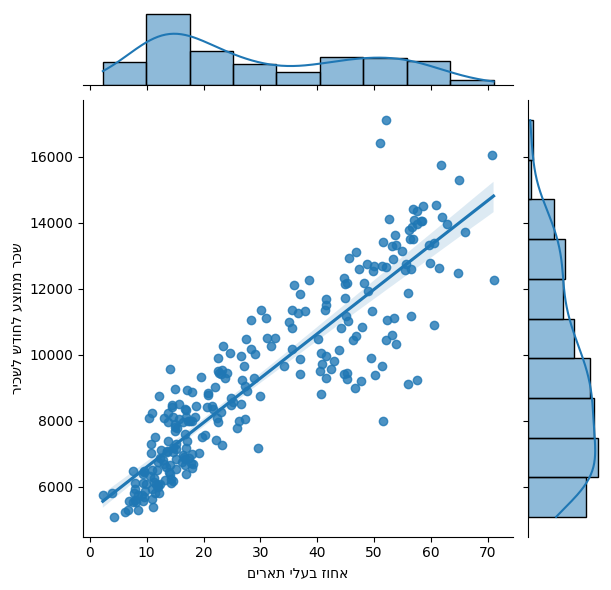

In [123]:
warnings.filterwarnings('ignore')
feature1 = 'השכלה גבוהה אחוז בעלי תארים מישראל מתוך אוכלוסיית בני 55-35'
feature2 = 'שכר ממוצע לחודש של שכירים (ש"ח) כלל השכירים'
joint_plot = sns.jointplot(x=feature1, 
              y=feature2, 
              data=dataset, 
              kind='reg')

# Set custom labels
joint_plot.set_axis_labels("אחוז בעלי תארים"[::-1], "שכר ממוצע לחודש לשכיר"[::-1])

# Show the plot
plt.show()
warnings.filterwarnings('default')


## Get top-k most similar via cosine similarity

In [124]:
from sklearn.metrics.pairwise import cosine_similarity
df = numerical_features.fillna(0)
cos_sim = cosine_similarity(df)
cos_sim

array([[1.        , 0.97793508, 0.96830269, ..., 0.65801776, 0.81812811,
        0.23602801],
       [0.97793508, 1.        , 0.98636451, ..., 0.76086274, 0.89024834,
        0.37068092],
       [0.96830269, 0.98636451, 1.        , ..., 0.75230084, 0.875064  ,
        0.36258154],
       ...,
       [0.65801776, 0.76086274, 0.75230084, ..., 1.        , 0.96561168,
        0.84723796],
       [0.81812811, 0.89024834, 0.875064  , ..., 0.96561168, 1.        ,
        0.7037546 ],
       [0.23602801, 0.37068092, 0.36258154, ..., 0.84723796, 0.7037546 ,
        1.        ]])

In [125]:
cities = df.index.tolist()
index_to_city = dict(zip(range(len(cities)), cities))
city_to_index = dict(zip(cities, range(len(cities))))

In [126]:
def get_top_k_similar(city, k=5):
    city_index = city_to_index[city]
    city_cos_sim = cos_sim[city_index]
    top_k_similar = city_cos_sim.argsort()[-k:][::-1]
    return [index_to_city[i] for i in top_k_similar]

In [127]:
get_top_k_similar(city)

['הרצלייה', 'כפר סבא', 'רעננה', 'חדרה', 'רמת גן']